# VariantFormer: Variant-to-Expression Prediction

## Predicting the Functional Impact of Genetic Variants on Gene Expression

### Executive Summary

VariantFormer is a state-of-the-art deep learning framework that predicts how genetic variants affect gene expression across diverse tissues and populations. This notebook demonstrates the core functionality of the VariantFormer system, showcasing how single nucleotide variants (SNVs) can be analyzed to understand their potential impact on cellular function and human health.

### Why This Matters

**Genetic variants** are the primary source of human genetic diversity and disease susceptibility. While the human genome contains ~4-5 million variants per individual, determining which variants have functional consequences remains a major challenge in genomics and precision medicine. 

**Key Applications:**
- 🧬 **Precision Medicine**: Identify variants that may cause disease or affect drug response
- 🔬 **Functional Genomics**: Understand the regulatory mechanisms controlling gene expression
- 🏥 **Clinical Genetics**: Prioritize variants for further investigation in patient care
- 📊 **Population Genetics**: Study how variants affect different ancestry groups

### Innovation

VariantFormer addresses several critical limitations of existing approaches:

1. **Multi-tissue Analysis**: Predicts variant effects across 64+ tissues and cell types
2. **Population-aware**: Considers genetic background from major world populations
3. **Mechanistic Understanding**: Models both cis-regulatory elements (CREs) and gene sequences
4. **Quantitative Predictions**: Provides continuous expression predictions rather than binary classifications

---


## Methodology Overview

### System Architecture

VariantFormer employs a sophisticated **transformer-based architecture** that integrates:

1. **Sequence Context**: DNA sequences around genes and regulatory elements
2. **Regulatory Networks**: Cis-regulatory elements (CREs) that control gene expression
3. **Population Genetics**: Allele frequencies across major world populations
4. **Tissue Specificity**: Expression patterns across 64 different tissues/cell types

### Scoring Strategies

#### 1. Expression Prediction Scores
- **Direct Output**: Predicted log-transformed gene expression values
- **Comparison**: Reference (wild-type) vs. heterozygous vs. homozygous variant genotypes
- **Tissue-specific**: Separate predictions for each tissue type

#### 2. Log2 Fold Change (log2fc) Regulation Scores as eQTLs
- **Population Comparison**: Analyzes expression differences across populations
- **Statistical Framework**: Based on established expression quantitative trait loci (eQTL) methodology
- **Biological Relevance**: Captures population-specific variant effects
- **Regulation Direction**: Uses log2 fold change to quantify gene regulation magnitude and direction
- **Reference Comparison**: Compares variant expression to reference genome expression  
- **Directional Interpretation**: 
  - **Positive log2fc (>0)**: Gene upregulation - variant increases expression
  - **Negative log2fc (<0)**: Gene downregulation - variant decreases expression  
  - **log2fc ≈ 0**: Minimal effect - variant has little impact
- **Population Weighting**: Aggregates scores across populations using allele frequency weights
- **Magnitude**: Larger absolute values indicate stronger regulatory effects


---

## Demo: Analyzing Variant Effects on Gene Expression

This demonstration showcases the VariantFormer system using a real genetic variant. We'll walk through the complete pipeline from variant specification to statistical scoring.

### Setup and Imports

### Initialize VariantFormer System

The `VariantProcessor` is the main interface for VariantFormer. It automatically:
- Loads pre-trained deep learning models
- Sets up genomic annotations and reference data  
- Configures tissue vocabularies and population data
- Prepares the analysis pipeline

### Step 1: Generate Expression Predictions

The prediction process involves several computational steps:

1. **Genomic Context Extraction**: Retrieve DNA sequences around the variant and target gene
2. **Regulatory Element Mapping**: Identify cis-regulatory elements (CREs) that may influence the gene
3. **Multi-population Analysis**: Generate predictions for reference genome and major world populations
4. **Tissue-specific Modeling**: Account for tissue-specific expression patterns
5. **Zygosity Comparison**: Compare reference, heterozygous, and homozygous variant effects

**Expected Output**: Expression predictions for each population-tissue-zygosity combination


In [8]:
# Essential imports
import sys
from pathlib import Path
import warnings

warnings.filterwarnings("ignore")

sys.path.append(str(Path.cwd().parent))

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from processors.variantprocessor import VariantProcessor

# Configure plotting
plt.style.use("seaborn-v0_8")
sns.set_palette("husl")
plt.rcParams["figure.figsize"] = (12, 6)

In [2]:
# Initialize VariantFormer
print("🚀 Initializing VariantFormer Variant Processor...")
vep = VariantProcessor()

print("✅ System initialized!")
print(f"🌍 Populations: {', '.join(vep.populations)}")
print(f"🧬 Tissues: {len(vep.tissue_vocab)} available")

2025-10-30 21:38:49 - utils.assets - WARNING - Using hardcoded manifest path for GeneSequencesManifestLookup
2025-10-30 21:38:49 - utils.assets - WARNING - Using hardcoded manifest path for CreSequencesManifestLookup


🚀 Initializing VariantFormer Variant Processor...
✅ System initialized!
🌍 Populations: REF_HG38, EAS, EUR, AFR, SAS, AMR
🧬 Tissues: 62 available


In [3]:
# Define multiple variants for analysis
print("🧬 Creating multi-variant dataset...")

# Example: 5 variants across different chromosomes and genes
multi_variants = {
    "chr": ["chr13"],
    "pos": [
        113978728,
    ],
    "ref": [
        "A",
    ],
    "alt": ["G"],
    "tissue": ["whole blood"],
    "gene_id": ["ENSG00000185989.10"],
}

variant_df = pd.DataFrame(multi_variants)

print("📊 Multi-variant dataset created:")
print(variant_df.to_string(index=False))
print(f"\n✅ Ready to analyze {len(variant_df)} variants simultaneously")

🧬 Creating multi-variant dataset...
📊 Multi-variant dataset created:
  chr       pos ref alt      tissue            gene_id
chr13 113978728   A   G whole blood ENSG00000185989.10

✅ Ready to analyze 1 variants simultaneously


In [4]:
# Run multi-variant predictions
print("🔬 Running VariantFormer multi-variant analysis...")
print("⏳ Processing genomic sequences and regulatory elements...")

# Predict expression effects for all variants
raw_predictions = vep.predict(var_df=variant_df, output_dir="/tmp/vep_multi_output")

print("✅ Multi-variant predictions completed!")
print(
    f"📊 Generated {len(raw_predictions)} predictions across all populations and variants"
)

🔬 Running VariantFormer multi-variant analysis...
⏳ Processing genomic sequences and regulatory elements...
Initializing Variant Processor...
Loading gene annotations...
Loading CRE annotations...
Loading variants...
Loaded 1 variants
Loaded 1 variants for processing
Mapped 1 gene-variant pairs
Loading BPE encoder...
Loaded BPE vocabulary from /app/vocabs/bpe_vocabulary_500_using_huggingface.json
Loading model...
Loading Seq2Reg model...
Loading Seq2Reg gene model...
Creating Seq2Gene model...
Model class: <class 'seq2gene.model_combined_modulator.Seq2GenePredictorCombinedModulator'>
Model architecture:
Model: Seq2GenePredictorCombinedModulator
  start_tkn: 96,768 params
  cre_tokenizer: 31,826,153 params
  gene_tokenizer: 31,826,153 params
  gene_map: 787,968 params
  cre_map: 787,968 params
  combined_modulator: 1,157,298,176 params
  tissue_heads: 4,726,273 params
  gene_loss: 0 params
Total number of parameters: 1,227,349,459
Loading checkpoint from /app/_artifacts/v4_pcg_epoch11_c

Using bfloat16 Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Model loaded successfully on cuda
Initializing trainer...
Initialization complete!


2025-10-17 21:15:30 - utils.assets - INFO - Downloading from S3: s3://czi-dnacell-staging/model/common/cres_all_genes_manifest.parquet
2025-10-17 21:15:30 - utils.assets - INFO - Downloading from S3: s3://czi-dnacell-staging/model/common/cres_all_genes_manifest.parquet
2025-10-17 21:15:30 - utils.assets - INFO - Downloading from S3: s3://czi-dnacell-staging/model/common/cres_all_genes_manifest.parquet


Predicting: |                                                                                                 …

2025-10-17 21:15:30 - utils.assets - INFO - Downloading from S3: s3://czi-dnacell-staging/model/common/cres_all_genes_manifest.parquet
2025-10-17 21:15:30 - utils.assets - INFO - Downloading from S3: s3://czi-dnacell-staging/model/common/cres_all_genes_manifest.parquet
2025-10-17 21:15:30 - utils.assets - INFO - Downloading from S3: s3://czi-dnacell-staging/model/common/cres_all_genes_manifest.parquet
2025-10-17 21:15:30 - botocore.credentials - INFO - Found credentials from IAM Role: vcp-dev-scidata
2025-10-17 21:15:30 - botocore.credentials - INFO - Found credentials from IAM Role: vcp-dev-scidata
2025-10-17 21:15:30 - botocore.credentials - INFO - Found credentials from IAM Role: vcp-dev-scidata
2025-10-17 21:15:30 - botocore.credentials - INFO - Found credentials from IAM Role: vcp-dev-scidata
2025-10-17 21:15:30 - botocore.credentials - INFO - Found credentials from IAM Role: vcp-dev-scidata
2025-10-17 21:15:30 - botocore.credentials - INFO - Found credentials from IAM Role: vcp-d

Predictions saved to /tmp/vep_multi_output/vep_D2C.parquet
Cleanup complete
✅ Multi-variant predictions completed!
📊 Generated 13 predictions across all populations and variants


### Step 2: Format Prediction Scores

This step formats the raw predictions into a structured format for downstream analysis. The formatting process includes:

1. **Data Transformation**: Restructure predictions to compare expression across populations
2. **Reference Comparison**: Use HG38 reference genome as baseline
3. **Population Comparison**: Organize expression differences across major world populations
4. **Data Pivoting**: Transform data into population-tissue matrix format for analysis


In [5]:
# Format and score the predictions
print("📊 Formatting and scoring predictions...")

# Step 1: Format scores
formatted_scores = vep.format_scores(raw_predictions)
print(f"✅ Formatted {len(formatted_scores)} variant-gene-tissue combinations")
print(formatted_scores.head().to_string(index=False))

# Step 2: Calculate eQTL scores (log2fc-based)
final_results = vep.eqtl_scores(formatted_scores)
print(f"✅ Calculated regulation scores for {len(final_results)} variants")
final_results.head()

📊 Formatting and scoring predictions...
✅ Formatted 1 variant-gene-tissue combinations
         variant_id              genes     tissues   chr       pos ref alt      variant_type  AFR-1-exp  AFR-2-exp  AMR-1-exp  AMR-2-exp  EAS-1-exp  EAS-2-exp  EUR-1-exp  EUR-2-exp  REF_HG38-0-exp  REF_HG38-1-exp  REF_HG38-2-exp  SAS-1-exp  SAS-2-exp
chr13_113978728_A_G ENSG00000185989.10 whole blood chr13 113978728   A   G Gene overlap only   3.333206   3.333206   3.333206   3.333206   3.333206   3.333206   3.227946   3.227946        3.167999        3.167999        3.167999   3.273004   3.273004
✅ Calculated regulation scores for 1 variants


,variant_id,genes,tissues,ref,alt,chr,pos,D2C-agg-log2fc-weighted,D2C-AFR-2-exp-log2fc,D2C-AMR-2-exp-log2fc,D2C-EAS-2-exp-log2fc,D2C-EUR-2-exp-log2fc,D2C-REF_HG38-2-exp-log2fc,D2C-SAS-2-exp-log2fc
0,chr13_113978728_A_G,ENSG00000185989.10,whole blood,A,G,chr13,113978728,0.058821,0.073338,0.073338,0.073338,0.027044,0.0,0.047044


### Step 3: eQTL Scoring with Log2 Fold Change

The final step applies **eQTL analysis using log2 fold change (log2fc)** to quantify gene regulation magnitude and direction:

**Statistical Framework:**
- **Reference Baseline**: Uses reference genome expression as the base
- **Population Weighting**: Aggregate scores using allele frequencies
- **Directional Interpretation**: Sign indicates regulation direction, magnitude indicates effect strength

**Score Interpretation:**
- **log2fc > 0**: Upregulation (variant increases gene expression)
  - log2fc ≥ 1.0: Strong upregulation (≥2-fold increase)
  - log2fc ≥ 0.5: Moderate upregulation (≥1.4-fold increase)
- **log2fc ≈ 0**: Neutral effect (variant has minimal impact)
- **log2fc < 0**: Downregulation (variant decreases gene expression)
  - log2fc ≤ -0.5: Moderate downregulation (≤0.7-fold decrease)
  - log2fc ≤ -1.0: Strong downregulation (≤0.5-fold decrease)


In [6]:
# Display multi-variant results summary
print("🏆 Multi-Variant Analysis Results:")
print("=" * 50)

# Summary by variant
for _, row in final_results.iterrows():
    variant_id = row["variant_id"]
    gene = row["genes"]
    tissue = row["tissues"]
    score = row["D2C-agg-log2fc-weighted"]

    # Interpret regulation direction based on log2fc
    if score >= 1.0:
        effect = "🔴 Strong Upregulation"
    elif score >= 0.5:
        effect = "🟠 Moderate Upregulation"
    elif score > -0.5:
        effect = "🟡 Neutral Effect"
    elif score > -1.0:
        effect = "🟠 Moderate Downregulation"
    else:
        effect = "🔴 Strong Downregulation"

    print(f"📍 {variant_id}")
    print(f"   Gene: {gene} | Tissue: {tissue}")
    print(f"   Log2FC: {score:.4f} | Effect: {effect}")
    print()

# Display detailed results table
display(
    final_results[["variant_id", "genes", "tissues", "D2C-agg-log2fc-weighted"]].round(
        4
    )
)

🏆 Multi-Variant Analysis Results:
📍 chr13_113978728_A_G
   Gene: ENSG00000185989.10 | Tissue: whole blood
   Log2FC: 0.0588 | Effect: 🟡 Neutral Effect



,variant_id,genes,tissues,D2C-agg-log2fc-weighted
0,chr13_113978728_A_G,ENSG00000185989.10,whole blood,0.0588


🎨 Creating multi-variant visualizations...


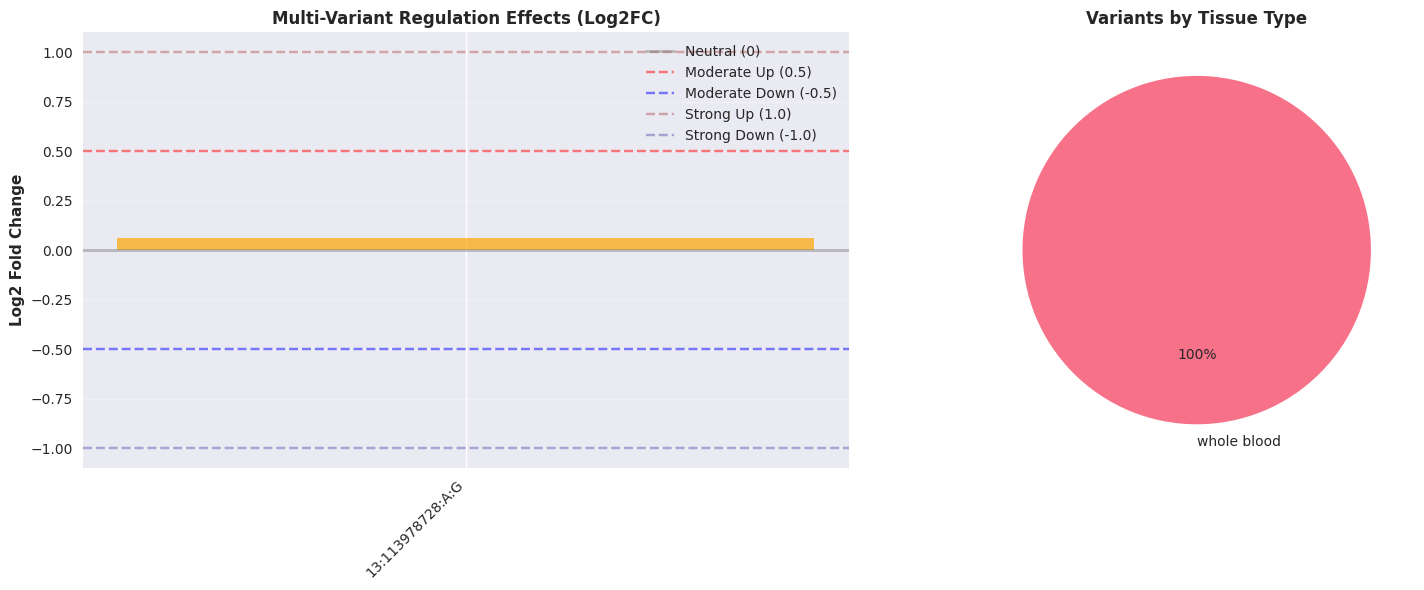

✅ Visualizations completed!


In [7]:
# Create focused visualizations
print("🎨 Creating multi-variant visualizations...")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Log2FC scores by variant
variant_scores = final_results[["variant_id", "D2C-agg-log2fc-weighted"]].copy()
variant_scores["variant_short"] = (
    variant_scores["variant_id"].str.replace("chr", "").str.replace("_", ":")
)

# Color bars based on log2fc values
colors = []
for x in variant_scores["D2C-agg-log2fc-weighted"]:
    if x >= 0.5:
        colors.append("red")  # Upregulation
    elif x <= -0.5:
        colors.append("blue")  # Downregulation
    else:
        colors.append("orange")  # Neutral

bars = ax1.bar(
    range(len(variant_scores)),
    variant_scores["D2C-agg-log2fc-weighted"],
    color=colors,
    alpha=0.7,
)

ax1.set_xticks(range(len(variant_scores)))
ax1.set_xticklabels(variant_scores["variant_short"], rotation=45, ha="right")
ax1.set_ylabel("Log2 Fold Change", fontweight="bold")
ax1.set_title("Multi-Variant Regulation Effects (Log2FC)", fontweight="bold")
ax1.axhline(
    y=0, color="gray", linestyle="-", alpha=0.5, linewidth=2, label="Neutral (0)"
)
ax1.axhline(y=0.5, color="red", linestyle="--", alpha=0.5, label="Moderate Up (0.5)")
ax1.axhline(
    y=-0.5, color="blue", linestyle="--", alpha=0.5, label="Moderate Down (-0.5)"
)
ax1.axhline(y=1.0, color="darkred", linestyle="--", alpha=0.3, label="Strong Up (1.0)")
ax1.axhline(
    y=-1.0, color="darkblue", linestyle="--", alpha=0.3, label="Strong Down (-1.0)"
)
ax1.legend(loc="best")
ax1.grid(True, alpha=0.3, axis="y")

# Plot 2: Tissue distribution
tissue_counts = final_results["tissues"].value_counts()
ax2.pie(
    tissue_counts.values, labels=tissue_counts.index, autopct="%1.0f%%", startangle=90
)
ax2.set_title("Variants by Tissue Type", fontweight="bold")

plt.tight_layout()
plt.show()

print("✅ Visualizations completed!")

## Key Findings & Applications

### Multi-Variant Insights
VariantFormer enables simultaneous analysis of variant sets to:
- **Prioritize variants** by regulatory impact
- **Compare effects** across different genomic loci  
- **Identify tissue-specific** regulatory variants
- **Population-stratified** variant interpretation

### Clinical Applications
🏥 **Variant Prioritization**: Focus on functionally relevant variants  
🧬 **Personalized Medicine**: Population-aware variant interpretation  
🔬 **Drug Development**: Identify expression-modulating variants  
📊 **GWAS Follow-up**: Prioritize causal variants from association studies  

---

## Summary

VariantFormer provides a **scalable, population-aware framework** for predicting variant effects on gene expression. The multi-variant capability enables efficient analysis of variant sets while maintaining tissue-specific and population-stratified insights.

**Key Advantages:**
- Multi-variant batch processing
- 64+ tissue types supported  
- 6 major world populations
- Directional regulation scoring (CDF-based)
- Transformer-based deep learning architecture

🧬 **Ready for genomics and precision medicine applications!**


# The following example demonstrates how VariantFormer can be integrated with personal genomic data:


In [9]:
# Example: VCF-based Analysis
print("🧬 VCF Integration Example")
print("=" * 40)

# VCF files contain individual genotype information
# This enables more precise analysis based on actual sample data

🧬 VCF Integration Example


In [10]:
# For VCF analysis, we can reuse the existing VariantProcessor
print("🔄 Using existing VariantFormer system for VCF analysis...")
print("📁 VCF files enable individual-specific genomic analysis")

🔄 Using existing VariantFormer system for VCF analysis...
📁 VCF files enable individual-specific genomic analysis


In [11]:
vep = VariantProcessor()

2025-10-30 21:40:44 - utils.assets - WARNING - Using hardcoded manifest path for GeneSequencesManifestLookup
2025-10-30 21:40:44 - utils.assets - WARNING - Using hardcoded manifest path for CreSequencesManifestLookup
2025-10-30 21:40:44 - utils.assets - INFO - Downloading from S3: s3://czi-variantformer/model/common/cres_all_genes_manifest.parquet
2025-10-30 21:40:45 - utils.assets - INFO - Loading parquet file: /tmp/tmp03vupwrn/model/common/cres_all_genes_manifest.parquet
2025-10-30 21:40:45 - utils.assets - INFO - Validated schema - found columns: {'gene_id', 'file_path'}
2025-10-30 21:40:45 - utils.assets - INFO - Loading parquet file: /mnt/czi-sci-ai/intrinsic-variation-gene-ex/youssef/src/variantformer/_artifacts/genes_seqs_manifest.parquet
2025-10-30 21:40:45 - utils.assets - INFO - Validated schema - found columns: {'population', '__index_level_0__', 'gene_id', 'file_path'}
2025-10-30 21:40:45 - utils.assets - INFO - Loading parquet file: /mnt/czi-sci-ai/intrinsic-variation-gene

In [15]:
# Example VCF integration parameters
vcf_path = os.path.join(str(Path.cwd().parent),"_artifacts/HG00096.vcf.gz")
sample_name = "HG00096"  # European sample from 1000 Genomes Project

print(f"📁 VCF File: {vcf_path.split('/')[-1]}")
print(f"👤 Sample: {sample_name}")

# Same variant but now with individual genotype context
vcf_variant_data = {
    "chr": ["chr13"],
    "pos": [113978728],
    "ref": ["A"],
    "alt": ["G"],
    "tissue": ["whole blood"],
    "gene_id": ["ENSG00000185989.10"],
}

vcf_variant_df = pd.DataFrame(vcf_variant_data)
print("\n🧬 Analyzing the same variant with individual genotype data:")
print(vcf_variant_df.to_string(index=False))

📁 VCF File: HG00096.vcf.gz
👤 Sample: HG00096

🧬 Analyzing the same variant with individual genotype data:
  chr       pos ref alt      tissue            gene_id
chr13 113978728   A   G whole blood ENSG00000185989.10


In [16]:
# Run VariantFormer with VCF integration
print("\n🔬 Running VariantFormer analysis with VCF integration...")
print("⏳ Processing individual genotype data...")

vcf_predictions = vep.predict(
    var_df=vcf_variant_df,
    output_dir="/tmp/vep_output_vcf",
    vcf_path=vcf_path,
    sample_name=sample_name,
)

print("✅ VCF-based predictions completed!")
print(f"📊 VCF predictions shape: {vcf_predictions.shape}")
print("\n🔍 Key differences from population-based analysis:")
print("   • Individual genotype information included")
print("   • Sample-specific vs population-average analysis")
print("   • More precise zygosity determination")


🔬 Running VariantFormer analysis with VCF integration...
⏳ Processing individual genotype data...
Initializing Variant Processor...
Loading gene annotations...
Loading CRE annotations...
Loading variants...
Loaded 1 variants
Loaded 1 variants for processing
Mapped 1 gene-variant pairs
Loading BPE encoder...
Loaded BPE vocabulary from /work/vocabs/bpe_vocabulary_500_using_huggingface.json
Loading model...
Loading Seq2Reg model...
Loading Seq2Reg gene model...
Creating Seq2Gene model...
Model class: <class 'seq2gene.model_combined_modulator.Seq2GenePredictorCombinedModulator'>
Model architecture:
Model: Seq2GenePredictorCombinedModulator
  start_tkn: 96,768 params
  cre_tokenizer: 31,826,153 params
  gene_tokenizer: 31,826,153 params
  gene_map: 787,968 params
  cre_map: 787,968 params
  combined_modulator: 1,157,298,176 params
  tissue_heads: 4,726,273 params
  gene_loss: 0 params
Total number of parameters: 1,227,349,459
Loading checkpoint from /work/_artifacts/v4_pcg_epoch11_checkpoi

Using bfloat16 Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Model loaded successfully on cuda
Initializing trainer...
Initialization complete!


Predicting: |          | 0/? [00:00<?, ?it/s]

2025-10-30 21:42:04 - utils.assets - INFO - Downloading from S3: s3://czi-variantformer/model/common/cres_all_genes_manifest.parquet
2025-10-30 21:42:05 - utils.assets - INFO - Loading parquet file: /tmp/tmp0_8orpq4/model/common/cres_all_genes_manifest.parquet
2025-10-30 21:42:05 - utils.assets - INFO - Validated schema - found columns: {'gene_id', 'file_path'}
2025-10-30 21:42:05 - utils.assets - INFO - Downloading from S3: s3://czi-variantformer/model/common/cres_all_genes/ENSG00000185989.10/gene_vocab.csv


Normal context: using 43 workers


2025-10-30 21:42:09 - utils.assets - INFO - Loading parquet file: /mnt/czi-sci-ai/intrinsic-variation-gene-ex/youssef/src/variantformer/_artifacts/cres_seqs_manifest.parquet
2025-10-30 21:42:09 - utils.assets - INFO - Validated schema - found columns: {'population', 'chromosome', '__index_level_0__', 'file_path'}
2025-10-30 21:42:09 - utils.assets - INFO - Downloading from S3: s3://czi-variantformer/model/common/reference_genomes/data_split/hg38/cres/data_split/hg38_chr13.pkl.gz
2025-10-30 21:42:12 - utils.assets - INFO - Loading parquet file: /mnt/czi-sci-ai/intrinsic-variation-gene-ex/youssef/src/variantformer/_artifacts/genes_seqs_manifest.parquet
2025-10-30 21:42:12 - utils.assets - INFO - Validated schema - found columns: {'population', '__index_level_0__', 'gene_id', 'file_path'}
2025-10-30 21:42:12 - utils.assets - INFO - Downloading from S3: s3://czi-variantformer/model/common/reference_genomes/data/hg38/genes/data/ENSG00000185989.10_hg38.npz


Predictions saved to /tmp/vep_output_vcf/vep_D2C.parquet
Cleanup complete
✅ VCF-based predictions completed!
📊 VCF predictions shape: (6, 14)

🔍 Key differences from population-based analysis:
   • Individual genotype information included
   • Sample-specific vs population-average analysis
   • More precise zygosity determination


In [17]:
# Format scores for VCF-based predictions
vcf_formatted_scores = vep.format_scores(vcf_predictions)

print("📊 VCF-based score formatting completed!")
print(f"📋 Includes sample-specific genotype: {sample_name}")
print(
    f"🧬 Available populations in results: {vcf_formatted_scores.columns[vcf_formatted_scores.columns.str.contains('-exp')].tolist()}"
)

📊 VCF-based score formatting completed!
📋 Includes sample-specific genotype: HG00096
🧬 Available populations in results: ['REF_HG38-0-exp', 'REF_HG38-1-exp', 'REF_HG38-2-exp', 'SAMPLE-0-exp', 'SAMPLE-1-exp', 'SAMPLE-2-exp']


In [18]:
# Display VCF-based formatted results
print("📋 VCF-based Formatted Results:")
print("=" * 30)

expression_cols_vcf = [col for col in vcf_formatted_scores.columns if "-exp" in col]
print("🎯 Expression values by population/sample:")

for col in expression_cols_vcf:
    if pd.notna(vcf_formatted_scores[col].iloc[0]):
        value = vcf_formatted_scores[col].iloc[0]
        label = col.replace("-exp", "").replace("SAMPLE", f"Sample {sample_name}")
        print(f"   {label:20}: {value:.4f}")

# Show comparison with population analysis
print(f"\n📊 Sample {sample_name} vs Population Analysis:")
display(vcf_formatted_scores.head())

📋 VCF-based Formatted Results:
🎯 Expression values by population/sample:
   REF_HG38-0          : 3.1680
   REF_HG38-1          : 3.1680
   REF_HG38-2          : 3.1680
   Sample HG00096-0    : 3.1680
   Sample HG00096-1    : 3.1680
   Sample HG00096-2    : 3.1680

📊 Sample HG00096 vs Population Analysis:


gt-exp,variant_id,genes,tissues,chr,pos,ref,alt,variant_type,REF_HG38-0-exp,REF_HG38-1-exp,REF_HG38-2-exp,SAMPLE-0-exp,SAMPLE-1-exp,SAMPLE-2-exp
0,chr13_113978728_A_G,ENSG00000185989.10,whole blood,chr13,113978728,A,G,Gene overlap only,3.167999,3.167999,3.167999,3.167999,3.167999,3.167999


In [19]:
# Apply eQTL scoring to VCF results
vcf_final_results = vep.eqtl_scores(vcf_formatted_scores)

print("✅ VCF-based eQTL scoring completed!")

if "D2C-agg-log2fc-weighted" in vcf_final_results.columns:
    vcf_agg_score = vcf_final_results["D2C-agg-log2fc-weighted"].iloc[0]
    original_agg_score = final_results["D2C-agg-log2fc-weighted"].iloc[0]

    print("\n📊 Comparison: Population vs Individual Analysis")
    print("=" * 45)
    print(f"🌍 Population-based Log2FC: {original_agg_score:.6f}")
    print(f"👤 Individual ({sample_name}) Log2FC: {vcf_agg_score:.6f}")

    difference = abs(vcf_agg_score - original_agg_score)
    print(f"📈 Absolute Difference: {difference:.6f}")

    if difference > 0.1:
        print("🔍 Substantial difference detected - individual genotype matters!")
    else:
        print("🤝 Similar results - population analysis is representative")

print("\n📋 VCF-based Final Results:")
display(vcf_final_results)

✅ VCF-based eQTL scoring completed!

📋 VCF-based Final Results:


gt-exp,variant_id,genes,tissues,ref,alt,chr,pos,D2C-REF_HG38-2-exp-log2fc,D2C-SAMPLE-2-exp-log2fc
0,chr13_113978728_A_G,ENSG00000185989.10,whole blood,A,G,chr13,113978728,0.0,0.0


---

## Results Interpretation & Biological Significance

### Understanding VariantFormer Scores

**Log2 Fold Change (log2fc) Score Interpretation:**
- **Range**: Typically -2 to +2 (directional regulation scoring with magnitude)
- **Regulation Guidelines**:
  - **Upregulation (positive values)**:
    - ≥ 1.0: **Strong Upregulation** - Variant causes ≥2-fold expression increase
    - 0.5-1.0: **Moderate Upregulation** - Variant causes 1.4-2× expression increase
  - **Neutral Effect**:
    - -0.5 to 0.5: **Minimal Impact** - Variant has little effect on expression
  - **Downregulation (negative values)**:
    - -1.0 to -0.5: **Moderate Downregulation** - Variant causes 0.5-0.7× expression decrease
    - ≤ -1.0: **Strong Downregulation** - Variant causes ≤0.5-fold expression decrease

**Biological Meaning:**
- log2fc = 1 means expression doubles (2× increase)
- log2fc = -1 means expression halves (0.5× decrease)
- log2fc = 0 means no change in expression

### Population Genetics Context

**Why Population Analysis Matters:**
1. **Allele Frequency Variation**: Variants have different frequencies across populations
2. **Linkage Disequilibrium**: Population-specific genetic backgrounds affect interpretation
3. **Clinical Relevance**: Treatment response may vary by ancestry

### Tissue Specificity

**Biological Insights:**
- Gene expression is highly tissue-specific
- Regulatory variants may only impact certain tissues
- Clinical symptoms depend on affected tissues
- Therapeutic targeting should consider tissue expression patterns

---


**Thank you for exploring VariantFormer!** 🧬✨

For more information, additional examples, and technical details, please refer to the complete VariantFormer documentation and research publications.
